# Зарплаты Data-специалистов 2020-2024 годов

Автор: Алена Свиридова (GitHub - AlenaAnalyst)

## Введение

### Цели и задачи проекта

Выявить зависимости зарплат от различных факторов.  
Исследовать разброс зарплат.  
Исследовать изменение зарплат по годам.  
Сравнить зарплаты в России и в США.  
Сравнить зарплаты аналитиков данных из датасета с российским рынком за 2024 год представленные в исследовании [NEWHR](https://newhr.org/data/research-analysts-2024)

### Содержимое проекта
   1. [Знакомство с данными: загрузка и предобработка](#1-bullet)
   2. [Предварительная обработка данных](#2-bullet)
   3. [Анализ по всем странам](#3-bullet)
   4. [Анализ русского сегмента](#4-bullet)
   5. [Анализ американского сегмента](#5-bullet)
   6. [Сравнение данных американского сегмента с анализом от NEWHR](#6-bullet)
   7. [Итоговый вывод](#7-bullet)

### Описание данных

Данные предоставленны [kaggle](https://www.kaggle.com/)

Dataset_salary_2024.csv - Этот файл содержит структурированные данные о зарплатах за 2024 год. Каждая строка представляет собой отдельную запись с такими данными, как должность, размер зарплаты, уровень опыта и местоположение. Набор данных представлен в формате CSV. Он предназначен для того, чтобы помочь пользователям изучить структуру зарплат, сравнить вознаграждение за разные должности и получить ценную информацию с помощью EDA.  

    work_year - рабочий год         
    experience_level - уровень опыта(EN ≈ Entry; MI ≈ Mid/Middle; SE ≈ Senior; EX ≈ Expert/Executive)
    employment_type - тип занятости(FT — полная занятость; CT — контрактная/проектная занятость; PT — частичная занятость; FL — фриланс/самозанятость)
    job_title - должность        
    salary - зарплата в год           
    salary_currency - валюта зарплаты   
    salary_in_usd - зарплата в долларах США  в год   
    employee_residence - место проживания
    remote_ratio - на сколько работа удаленная(0% 50% 100%)
    company_location - местоположение компании
    company_size - размер компании

<a class="anchor" id="1-bullet"></a>
## Знакомство с данными: загрузка и предобработка

### Вывод общей информации

In [1]:
pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math
from matplotlib.patches import Circle
from matplotlib_venn import venn3
from IPython.display import HTML
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('Dataset_salary_2024.csv')
df_for_ru = pd.read_csv('Dataset_salary_2024.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


Выведем уникальные значения столбцов:

In [6]:
columns_unique = ['work_year', 'experience_level', 'employment_type', 'job_title',
        'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']

for column in columns_unique:
    print(f"Столбец '{column}':")
    print(df[column].unique())
    print("-!" * 40)

Столбец 'work_year':
[2024 2022 2023 2020 2021]
-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!
Столбец 'experience_level':
['SE' 'MI' 'EN' 'EX']
-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!
Столбец 'employment_type':
['FT' 'CT' 'PT' 'FL']
-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!
Столбец 'job_title':
['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science En

In [7]:
print("Min salary:", df['salary'].min(), "Max salary:", df['salary'].max())
print("Min salary in USD:", df['salary_in_usd'].min(), "Max salary in USD:", df['salary_in_usd'].max())

Min salary: 14000 Max salary: 30400000
Min salary in USD: 15000 Max salary in USD: 800000


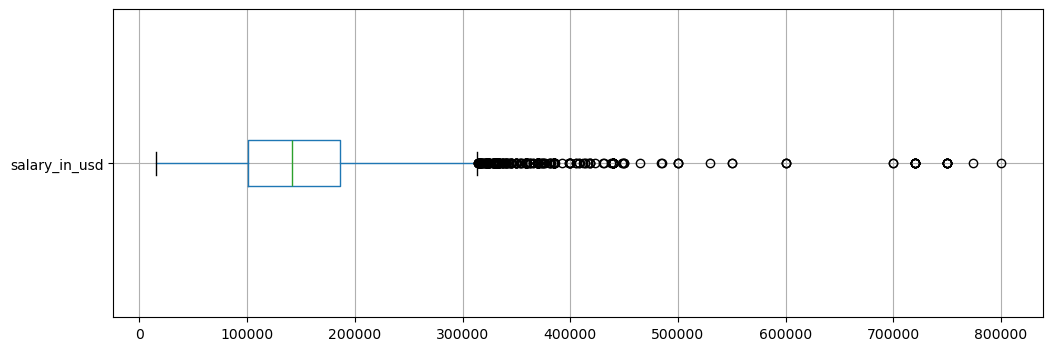

In [8]:
df.boxplot(column='salary_in_usd',vert=False, figsize=(12, 4))
plt.show()

Выводы:  

Для анализа Аналитиков данных отобрать професии содержащие "Data Analy" или "Analy"  
Мусорных значений не обнаружено.  
Нулевых значений не обнаружено.  
Добавить столбцы зарплата в рублях в месяц и зарплата в долларах в месяц.  
Выбросы в salary_in_usd начинаются с ~310000 в год

<a class="anchor" id="2-bullet"></a>
## Предварительная обработка данных

### Создание дополнительных столбцов

Добавим столбцы Зарплата в рублях в месяц и Зарплата в долларах в месяц.  
Для перевода в рубли возьмем среднее значение валюты за год.  
2020 - 71,94 рубля  
2021 - 73,6 рубля  
2022 - 68,1 рубля  
2023 - 84,66 рубля  
2024 - 92,44 рубля

In [9]:
def rub_rate(year):
    if year == 2020:
        return 71.94
    elif year == 2021:
        return 73.6
    elif year == 2022:
        return 68.1
    elif year == 2023:
        return 84.66
    elif year == 2024:
        return 92.44

In [10]:
df['rub_rate_in_year'] = df['work_year'].apply(rub_rate)

In [11]:
df['salary_in_usd_month'] = (df['salary_in_usd']/12).round(2)

In [12]:
df['salary_in_rub_month'] = (df['salary_in_usd_month']*df['rub_rate_in_year']).round(2)

In [13]:
df = df.drop(columns='rub_rate_in_year')

In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_month,salary_in_rub_month
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,16894.17,1561697.07
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,7676.50,709615.66
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,10875.00,1005285.00
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,8000.00,739520.00
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,15833.33,1463633.03


### Фильтрация

Для этого анализа оставим зарплаты без выбросов.

In [15]:
# Найдем верхнюю и нижнюю границы
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)

МР = Q3-Q1

df_min = Q1-1.5*МР
df_max = Q3+1.5*МР

In [16]:
df = df[ (df['salary_in_usd']>df_min) & (df['salary_in_usd']<df_max) ]

Оставим професии содержащие в названиях: "Analy". Нужно оставить только аналитиков.

In [17]:
df = df[df['job_title'].str.contains("Analy", na=False)]

### Обработка дубликатов

In [18]:
dub_count = df.duplicated().sum()
display(f"Явных дубликатов: {dub_count}  Доля дубликатов: {(dub_count/df.shape[0]).round(2)}")

'Явных дубликатов: 1200  Доля дубликатов: 0.34'

В таблице нельзя однозначно обозначить дубликаты. Две одинаковые строки имеют право на существование в таком датасете.  
Процент явных дубликатов 40%, что не позволяет просто удалить их.
Оставляем.

Вывод:  
Мы не можем просто убрать, то что программно считается явными дубликатами (так как логически они могут ими не быть и их 40% данных). Можно рассматривать параллельно данные с дубликатами и без. Сравнить.  
Добавлены столбцы с зарплатами в рублях.  
Убраны выбросы по зарплатам.

<a class="anchor" id="3-bullet"></a>
## Анализ по всем странам

In [19]:
categorys_cad = df.groupby('experience_level')['work_year'].count().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_count_level= pd.DataFrame({'Уровень опыта':categorys_cad.index, 'Количество':categorys_cad.values})

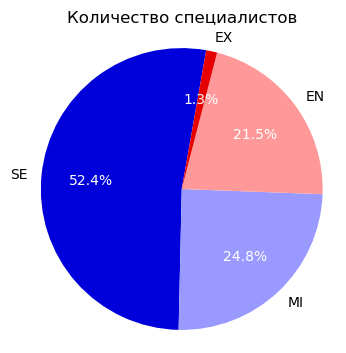

In [20]:
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(df_count_level['Количество'],
        labels=df_count_level['Уровень опыта'],
        autopct='%1.1f%%',
        startangle=80,
        textprops={'fontsize': 10},
        pctdistance=0.65,
        colors=sns.color_palette("seismic", len(df_count_level['Уровень опыта']))
        )
# Меняем цвет процентов
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Количество специалистов', fontsize=12,pad=10)
plt.axis('equal')

plt.show()

Примечательно, что специалисты уровня «Сеньор» составляют более половины анализируемой выборки. При этом доли начинающих специалистов и экспертов крайне невелики.  
Представленный датасет демонстрирует нетипичное распределение по уровням квалификации (50 % сеньоров при рыночных 25–35 %). Это может быть обусловлено спецификой источника данных. Результаты анализа следует трактовать с учётом данного смещения.  
В анализе нужно использовать метрики устойчивые к выбросам (медиана, квартили)

In [21]:
company = df.groupby('company_location')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Локация компании':company.index, 'Медиана зарплаты в месяц':company.values})

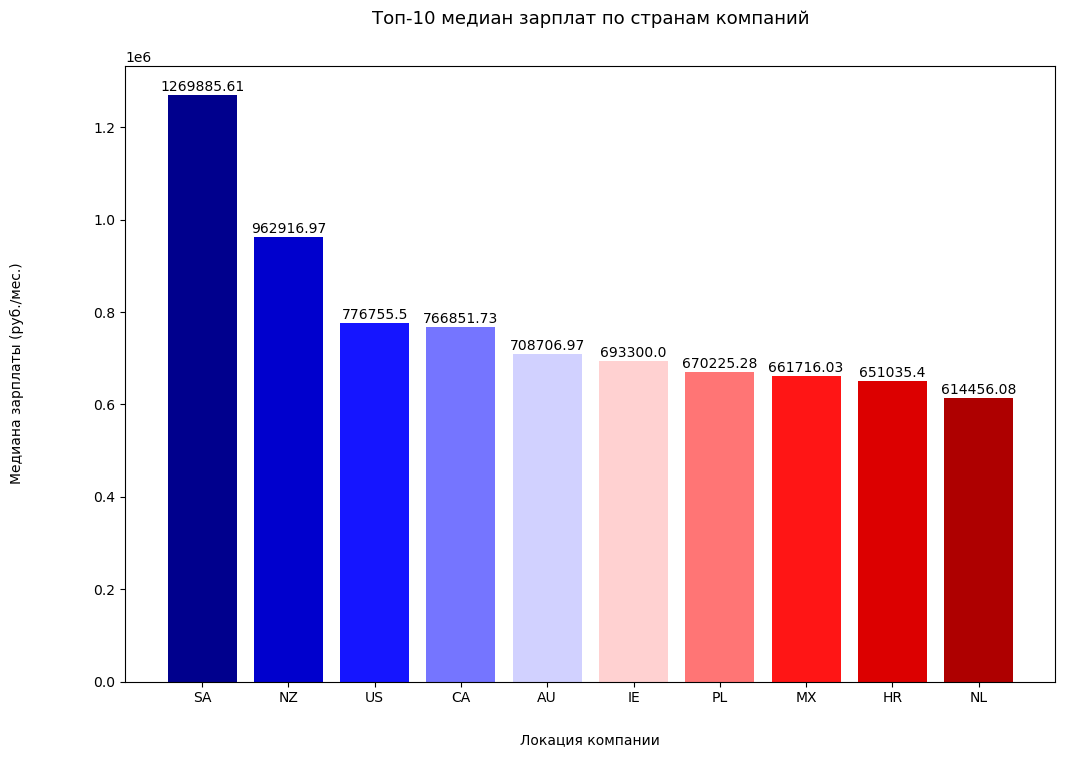

In [22]:
# Создание графика
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df_company['Локация компании'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2),color=sns.color_palette("seismic", len((df_company['Медиана зарплаты в месяц'][:10]).round(2))))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Локация компании', labelpad=20)
plt.ylabel('Медиана зарплаты (руб./мес.)', rotation=90, labelpad=50)
plt.title('Топ-10 медиан зарплат по странам компаний', fontsize=13,pad=30)
plt.show()

Разброс значений между лидером (SA) и замыкающими странами (MX, HR) составляет ~100–150%, что подчёркивает значительные различия в уровне доходов по регионам.  
Самая высокая медианная зарплата наблюдается в стране с кодом SA — 1 269 885,61 руб./мес. Это примерно на 30–40% выше, чем у ближайшего конкурента (NZ). Это может указывать на:  

    - высокий уровень жизни и стоимость труда в стране  
    - специфику отрасли (например, доминирование высокооплачиваемых IT-компаний)  
    - высокий спрос на специалистов с определёнными навыками  
США занимают третье место. Это подтверждает репутацию США как страны с высоким уровнем доходов в IT и аналитических профессиях, хотя результат ниже ожидаемого, возможно, связано с конвертацией валют или спецификой выборки.  

    1. для соискателей: страны SA, NZ, US, CA — приоритетные направления для поиска высокооплачиваемой работы  
    2. для работодателей: страны PL, MX, HR могут быть интересны для аутсорсинга с умеренными затратами на персонал  
    3. для аналитиков рынка труда: график демонстрирует глобальные диспропорции в оплате труда.

In [23]:
employment_type = df.groupby('employment_type')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Тип занятости':employment_type.index, 'Медиана зарплаты в месяц':employment_type.values})

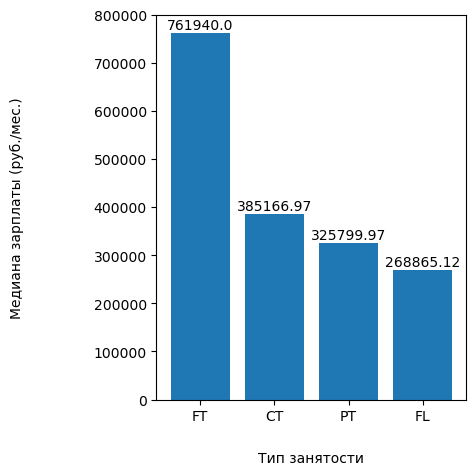

In [24]:
# Создание графика
fig, ax = plt.subplots(figsize=(4, 5))
bars = ax.bar(df_company['Тип занятости'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Тип занятости', labelpad=20)
plt.ylabel('Медиана зарплаты (руб./мес.)', rotation=90, labelpad=50)
plt.show()

Full-Time в 2 раза больше имеет значение медианы чем следующий за ним Contract. Разница между самой высокой FT и самой низкой FL зарплатой составляет около 100% относительно FL. Это подчёркивает значительные различия в доходах в зависимости от типа занятости.  
Наименьшая медианная зарплата у категории Freelance. Это самый низкооплачиваемый тип занятости из представленных, что может быть связано с:

    - нестабильностью потока заказов
    - отсутствием гарантий соцпакета
    - неравномерной загрузкой

In [25]:
job = df.groupby('job_title')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Профессия':job.index, 'Медиана зарплаты в месяц':job.values})

C:\Users\Alen\AppData\Local\Temp\ipykernel_1464\1273252.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_company['Профессия'][:10], rotation=25)


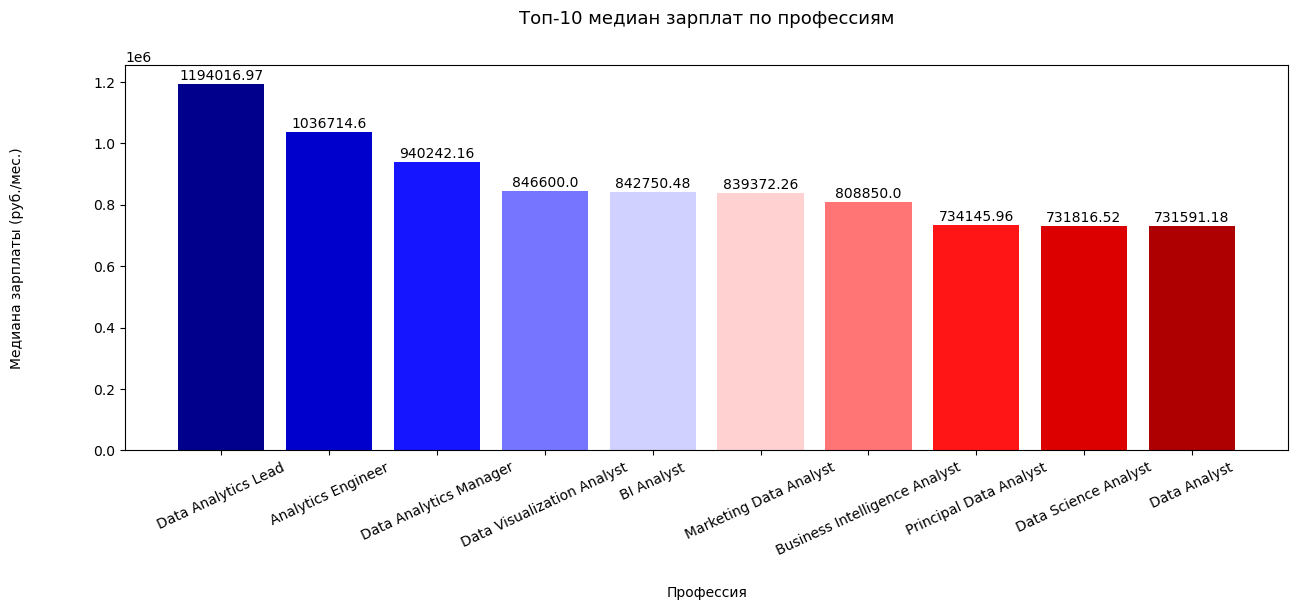

In [26]:
# Создание графика
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(df_company['Профессия'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2),color=sns.color_palette("seismic", len((df_company['Медиана зарплаты в месяц'][:10]).round(2))))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

ax.set_xticklabels(df_company['Профессия'][:10], rotation=25)
plt.xlabel('Профессия', labelpad=20)
plt.ylabel('Медиана зарплаты (руб./мес.)', rotation=90, labelpad=50)
plt.title('Топ-10 медиан зарплат по профессиям', fontsize=13,pad=30)
plt.show()

Лидерские и управленческие позиции (Lead, Manager) оплачиваются выше всего. Это подтверждает премиальность ролей с ответственностью за команду и стратегические решения.  
Инженерные и визуализационные навыки (Analytics Engineer, Data Visualization Analyst) ценятся высоко, чуть ниже топ-менеджмента.  
Базовые аналитические роли (Data Analyst, Principal Data Analyst) находятся в нижней части рейтинга, что может быть связано с большей доступностью специалистов на рынке.  
Аналитики, работающие на стыке с бизнесом (BI, маркетинг), получают чуть больше просто аналитиков данных.  
Data Science, несмотря на «модность» направления, пока не гарантирует самых высоких зарплат, вероятно, из-за высокой конкуренции или специфики проектов.

In [27]:
job = df.groupby('experience_level')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Уровень опыта':job.index, 'Медиана зарплаты в месяц':job.values})

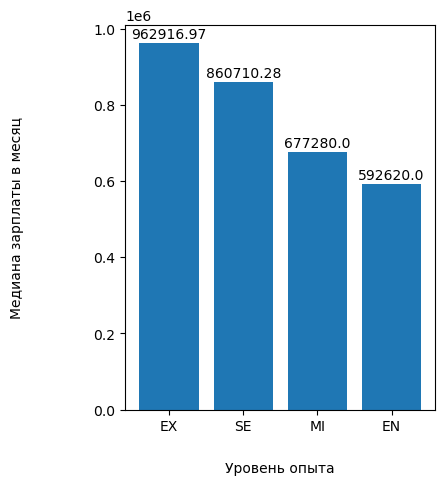

In [28]:
# Создание графика
fig, ax = plt.subplots(figsize=(4, 5))
bars = ax.bar(df_company['Уровень опыта'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Уровень опыта', labelpad=20)
plt.ylabel('Медиана зарплаты в месяц', rotation=90, labelpad=50)
plt.show()

Наблюдается стабильный рост медианной зарплаты с каждым уровнем опыта. Это говорит о том, что рынок труда стимулирует специалистов развиваться и наращивать компетенции для увеличения дохода.  
Видна разница между **уровнями опыта**, но не такая сильная как при анализе **типа занятости**. Разрыв между уровнем EX и EN составляет около 62% относительно начального уровня. А не 100% как было с **типа занятости**.

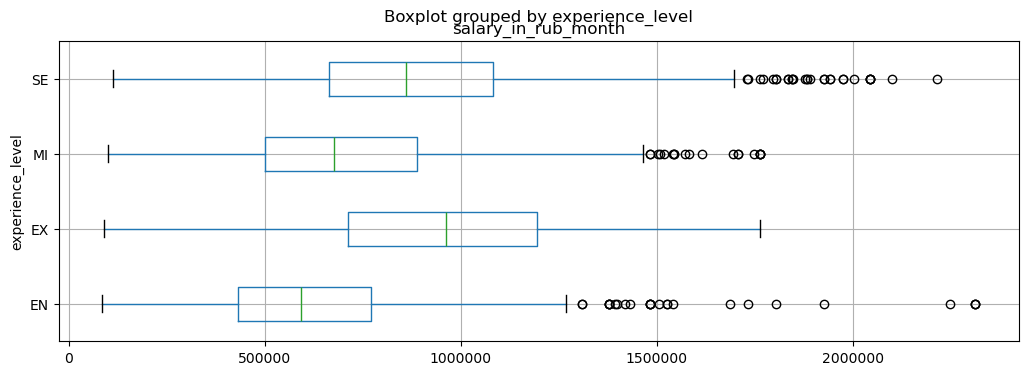

In [29]:
df.boxplot(column='salary_in_rub_month', by='experience_level', vert=False, figsize=(12, 4))
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Медиана зарплат растёт с увеличением уровня опыта: от EN к EХ.  
Диапазон зарплат (размах между квартилями) также расширяется с ростом опыта, что говорит о большем разбросе доходов у более опытных специалистов.  
С ростом опыта увеличивается вариативность зарплат (шире межквартильный размах), что говорит о большем влиянии индивидуальных факторов (навыки, компания, проект) на доход.  
Выбросы демонстрируют, что на любом уровне опыта есть возможность зарабатывать значительно выше медианы.

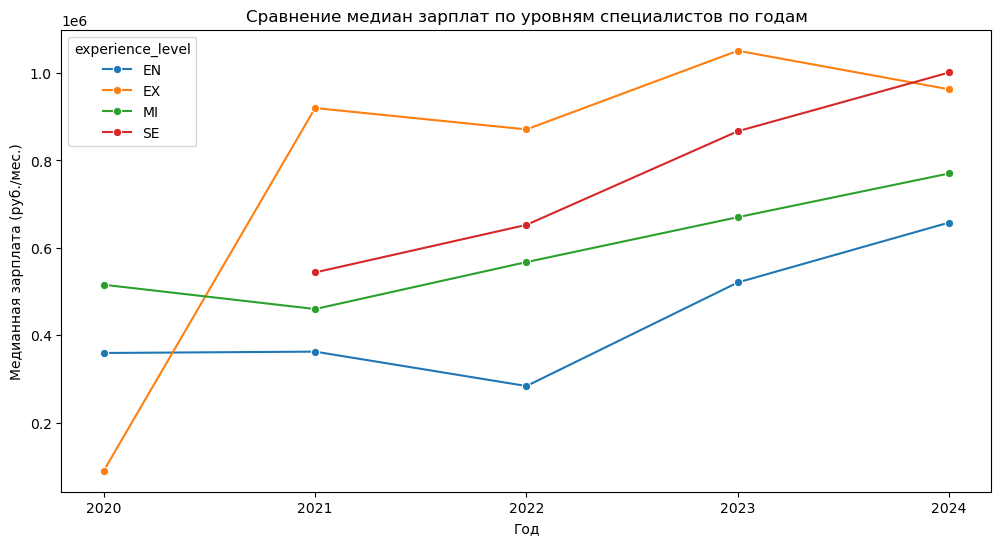

In [30]:
median_salaries = df.groupby(['work_year', 'experience_level'])['salary_in_rub_month'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=median_salaries, x='work_year', y='salary_in_rub_month', hue='experience_level', marker='o')
plt.title('Сравнение медиан зарплат по уровням специалистов по годам')
plt.xlabel('Год')
plt.ylabel('Медианная зарплата (руб./мес.)')
plt.xticks(df['work_year'].unique())
plt.grid(False)
plt.show()

Иерархия зарплат по уровням опыта сохранялась с 2021 по 2023. В 2024 Senior опередили Expert. В 2020 году недостаточно данных по Expert и Senior.  
Для Entry произошел обвал зарплат в 2022 году, но выровнялся уже в 2023.  
У Middle самый стабильный линейный рост зарплат.  
В 2024 году между Entry и Middle мы видим сокращение разницы, когда между Middle и Senior она наоборот увеличивается.  
Все уровни растут от года к году, кроме Expert. Наблюдается общий рост зарплатных ожиданий, что требует корректировки бюджетов на фонд оплаты труда.

In [31]:
# Задаём таргет и признаки
X = df[['experience_level', 'job_title', 'remote_ratio']]
y = df['salary_in_usd']

# Выделяем категориальные признаки
cat_features = ['experience_level', 'job_title']
num_features = ['remote_ratio']

# Препроцессор: OHE для категорий
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

# Модель
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('reg', LinearRegression())
])

# Тренируем
model.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['experience_level',
                                                   'job_title']),
                                                 ('num', 'passthrough',
                                                  ['remote_ratio'])])),
                ('reg', LinearRegression())])

In [32]:
ohe = model.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_features)
all_features = list(ohe_features) + num_features
coefs = pd.DataFrame({
    'feature': all_features,
    'coef': model.named_steps['reg'].coef_
})

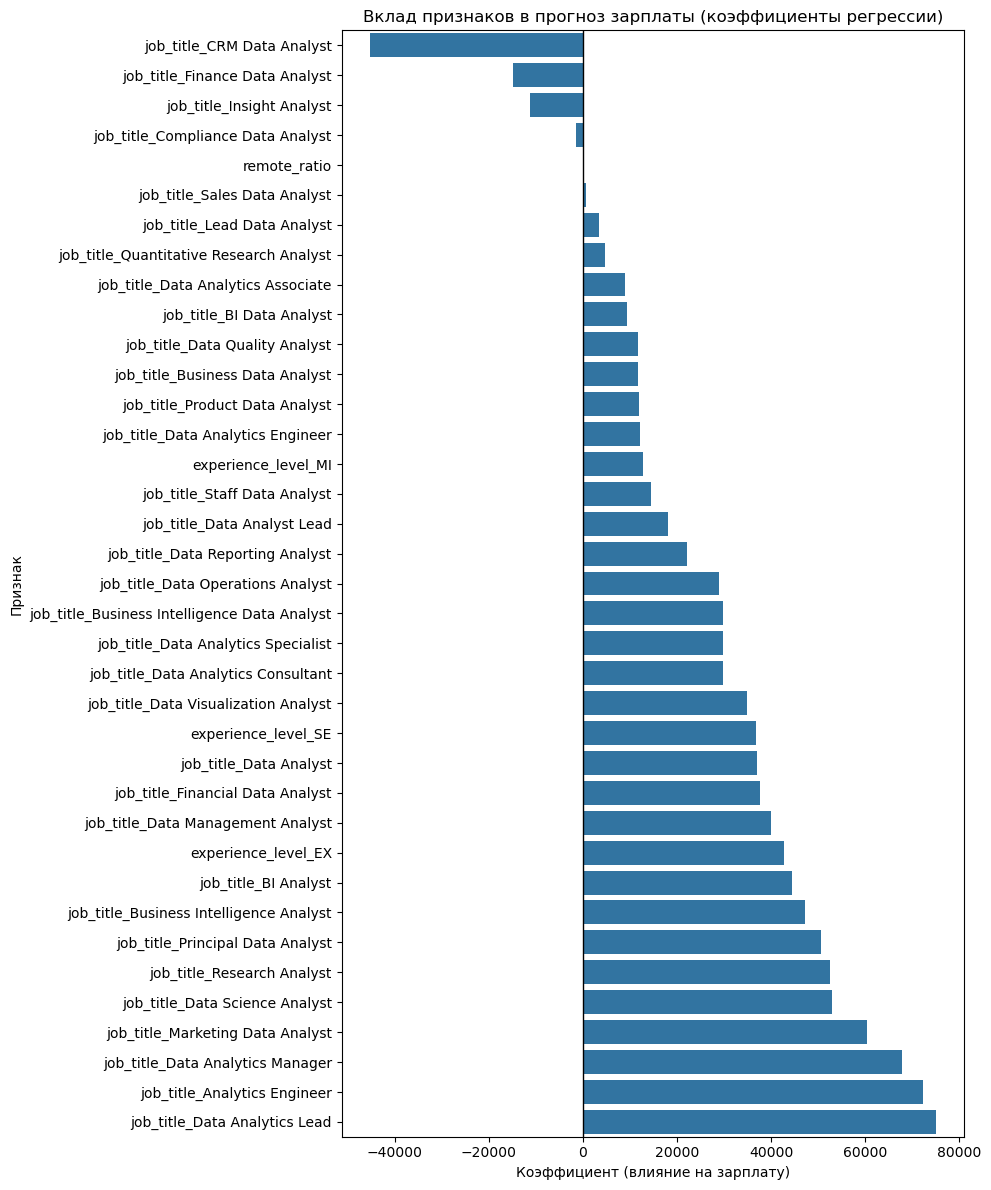

In [33]:
# сортируем, чтобы снизу были отрицательные, сверху положительные
coefs_sorted = coefs.sort_values('coef', ascending=True)

plt.figure(figsize=(10, 12))
sns.barplot(
    data=coefs_sorted,
    x='coef',
    y='feature'
)

plt.title('Вклад признаков в прогноз зарплаты (коэффициенты регрессии)')
plt.xlabel('Коэффициент (влияние на зарплату)')
plt.ylabel('Признак')
plt.axvline(0, color='black', linewidth=1)  # вертикальная линия нуля для ориентира
plt.tight_layout()
plt.show()

Уровни опыта явно влияют на зарплату, чем выше уровень, тем значительнее коэффициент. Это подтверждает, что с ростом опыта растёт и доход.  
Роли, связанные с BI, отчётностью и управлением данными(BI Analyst, Data Reporting Analyst, Data Management Analyst), занимают промежуточное положение.  
Позиции с приставкой Lead, Principal, Manager имеют больший коэффициент, чем базовые роли (Analyst, Associate). Это демонстрирует премиальность управленческих и экспертных позиций.  

<a class="anchor" id="4-bullet"></a>
## Анализ русского сегмента

В связи с ограниченностью данных по русскому сегменту проведённый анализ не является репрезентативным и предлагается исключительно для общего ознакомления.

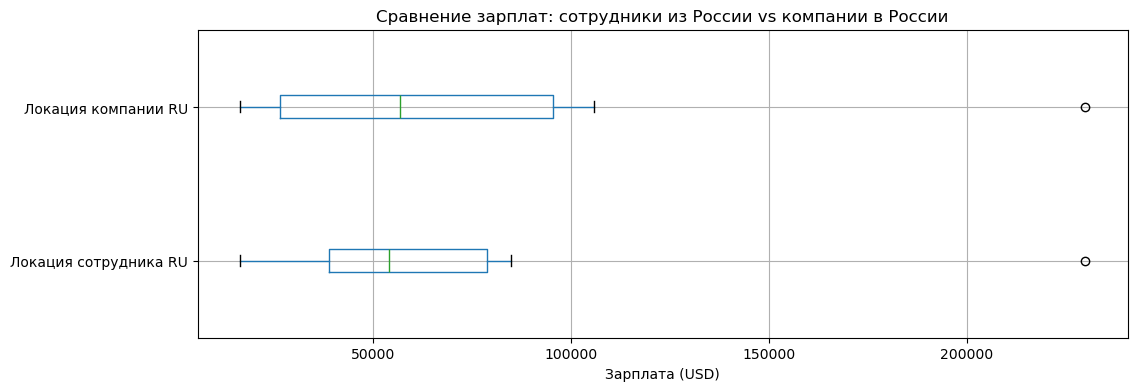

In [34]:
combined_df = pd.DataFrame({
    'Локация сотрудника RU': df_for_ru[df_for_ru['employee_residence'] == 'RU']['salary_in_usd'],
    'Локация компании RU': df_for_ru[df_for_ru['company_location'] == 'RU']['salary_in_usd']
})

combined_df.boxplot(vert=False, figsize=(12, 4))
plt.xlabel('Зарплата (USD)')
plt.title('Сравнение зарплат: сотрудники из России vs компании в России')
plt.show()

Сотрудникам работающим из России платят меньше чем сотрудникам работающим в русских компаниях.  
Возможно, связано с коэффициентом региона, компании при назначении зарплат делают поправку на стоимость жизни, где проживает сотрудник. Таким образом русские компании платят сотрудникам не из россии больше в зависимости от их региона.

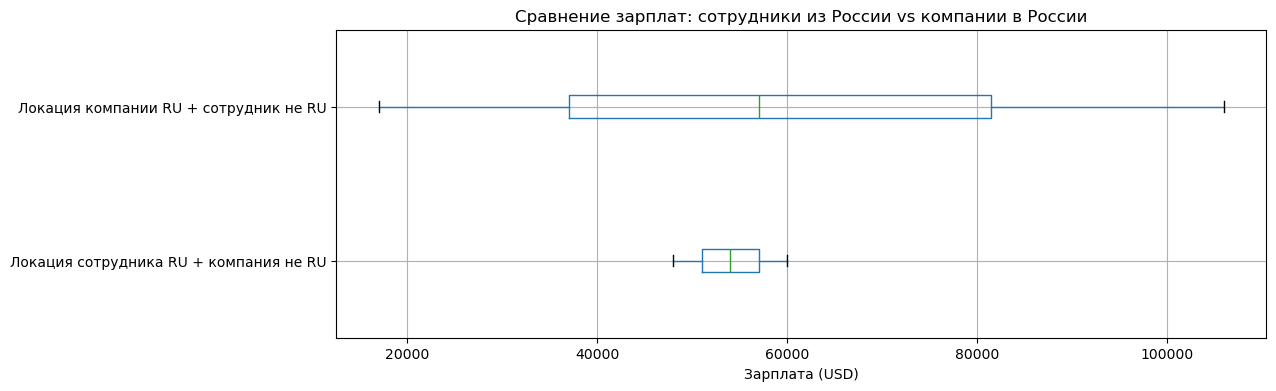

In [35]:
combined_df = pd.DataFrame({
    'Локация сотрудника RU + компания не RU': df_for_ru[(df_for_ru['employee_residence'] == 'RU')&(df_for_ru['company_location'] != 'RU')]['salary_in_usd'],
    'Локация компании RU + сотрудник не RU': df_for_ru[(df_for_ru['employee_residence'] != 'RU')&(df_for_ru['company_location'] == 'RU')]['salary_in_usd']
})

combined_df.boxplot(vert=False, figsize=(12, 4))
plt.xlabel('Зарплата (USD)')
plt.title('Сравнение зарплат: сотрудники из России vs компании в России')
plt.show()

**Данных слишком мало** в датасете для изучения вопроса, но просто из интереса можно сделать такие предположения:  
Иностранцы в российских компаниях получают более разношёрстные и иногда намного более высокие зарплаты.  
Русские в иностранных компаниях получают меньше и гораздо более стабильно.  
Их нельзя считать выводами, только теория. Для проверки нужен другой датасет.

<a class="anchor" id="5-bullet"></a>
## Анализ американского сегмента в 2024 году

In [36]:
df_for_us = df[(df['work_year']==2024) & (df['company_location']=='US')]
df_for_us.shape

(1165, 13)

In [37]:
employment_type = df_for_us.groupby('employment_type')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Тип занятости':employment_type.index, 'Медиана зарплаты в месяц':employment_type.values})

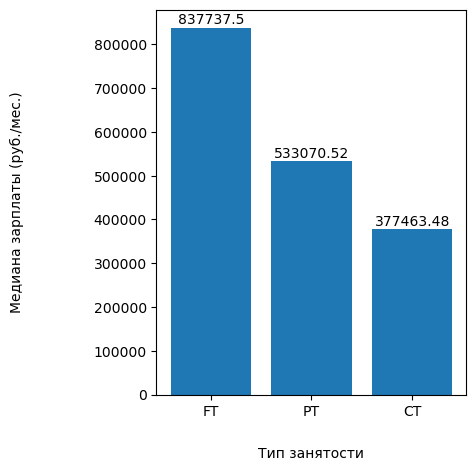

In [38]:
# Создание графика
fig, ax = plt.subplots(figsize=(4, 5))
bars = ax.bar(df_company['Тип занятости'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Тип занятости', labelpad=20)
plt.ylabel('Медиана зарплаты (руб./мес.)', rotation=90, labelpad=50)
plt.show()

FT > PT > CT  
Это демонстрирует, что стабильность и полный рабочий график положительно влияют на уровень дохода.  
График показывает, что полная занятость требует наибольших затрат на фонд оплаты труда, тогда как контрактная работа, наименее затратный вариант.  
Частичная занятость (PT) может быть компромиссным вариантом для баланса между доходом и свободным временем.
В США PT более выгоден для сотрудников чем CT. На мировом рынке наблюдалась обратная картина.

In [39]:
job = df_for_us.groupby('job_title')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Профессия':job.index, 'Медиана зарплаты в месяц':job.values})

C:\Users\Alen\AppData\Local\Temp\ipykernel_1464\1273252.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_company['Профессия'][:10], rotation=25)


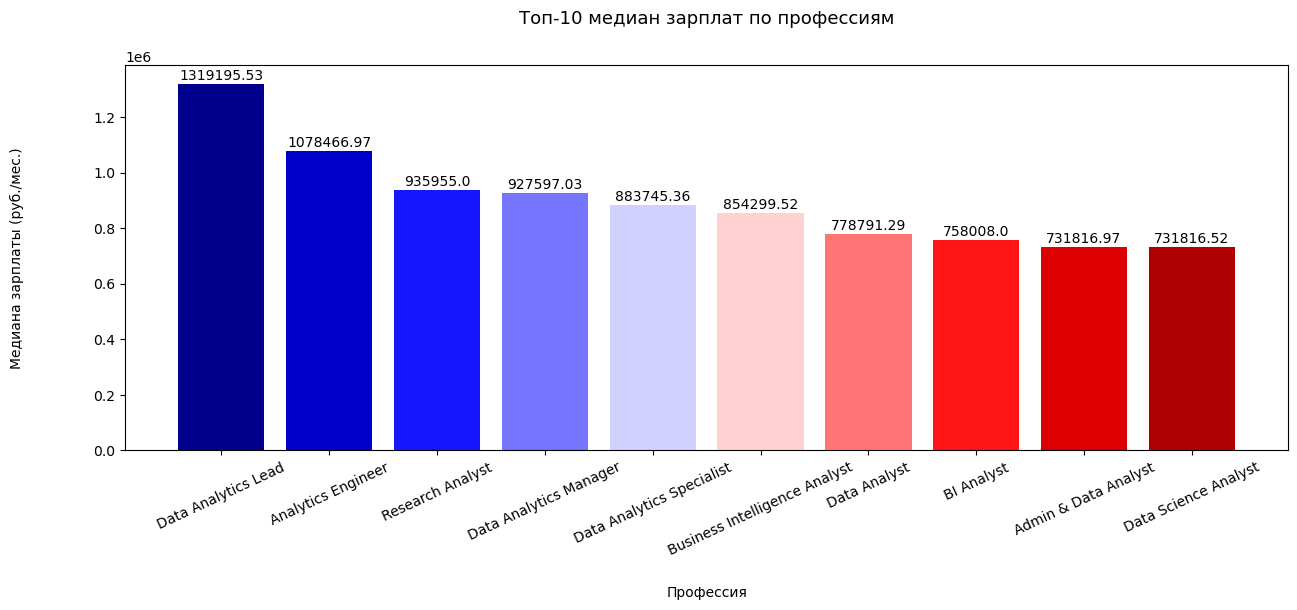

In [40]:
# Создание графика
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(df_company['Профессия'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2),color=sns.color_palette("seismic", len((df_company['Медиана зарплаты в месяц'][:10]).round(2))))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

ax.set_xticklabels(df_company['Профессия'][:10], rotation=25)
plt.xlabel('Профессия', labelpad=20)
plt.ylabel('Медиана зарплаты (руб./мес.)', rotation=90, labelpad=50)
plt.title('Топ-10 медиан зарплат по профессиям', fontsize=13,pad=30)
plt.show()

Чем выше уровень ответственности (лидерские позиции, инженерия, управление), тем выше зарплата  
Специализация в области аналитики данных существенно влияет на доход  
Административные и базовые аналитические роли оплачиваются ниже, чем экспертные  
По сравнению с мировым трендом, просто Аналитик данных вырос в цене, BI аналитик упал. Data Science сохраняет низкую позицию в топе.  По-прежнему лидируют Lead аналитик и инженер аналитик.  
Базовые аналитические роли могут быть стартовой точкой, но требуют дальнейшего развития для существенного роста дохода. Развитие навыков в области управления данными и исследований даёт конкурентное преимущество на рынке труда.

In [41]:
job = df_for_us.groupby('experience_level')['salary_in_rub_month'].median().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_company = pd.DataFrame({'Уровень опыта':job.index, 'Медиана зарплаты в месяц':job.values})

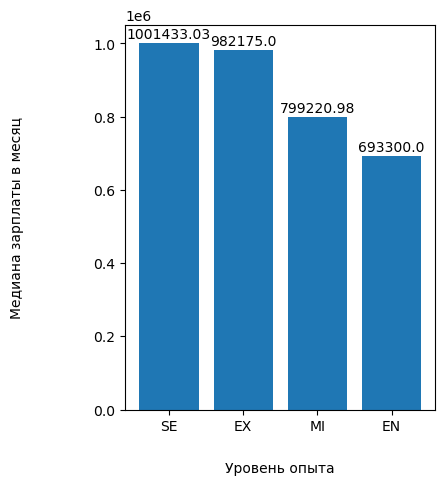

In [42]:
# Создание графика
fig, ax = plt.subplots(figsize=(4, 5))
bars = ax.bar(df_company['Уровень опыта'][:10], (df_company['Медиана зарплаты в месяц'][:10]).round(2))

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Уровень опыта', labelpad=20)
plt.ylabel('Медиана зарплаты в месяц', rotation=90, labelpad=50)
plt.show()

В США в 2024 году Сеньоры обогнали Экспертов.  
Рынок поощряет долгосрочное развитие в профессии: каждый уровень опыта даёт ощутимый рост зарплаты.  
Начальный уровень (EN) хоть и оплачивается меньше, но даёт «точку входа» в профессию с перспективой значительного роста.

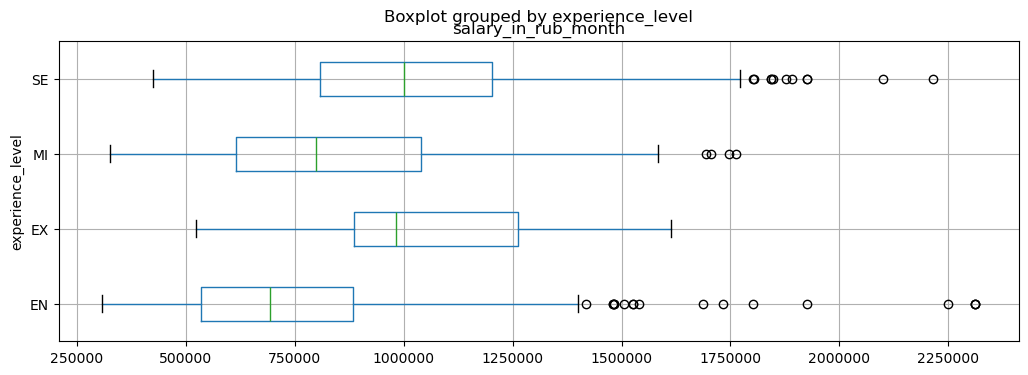

In [43]:
df_for_us.boxplot(column='salary_in_rub_month', by='experience_level', vert=False, figsize=(12, 4))
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Наблюдается прямой корреляционный рост медианной зарплаты с уровнем опыта: EN < MI < EX < SE  
Межквартильный размах (IQR, «ящик») увеличивается с ростом опыта — это говорит о большей вариативности доходов у более опытных специалистов.  
Выбросы присутствуют во всех категориях, но особенно заметны в SE и EN  
Первый квартиль (Q1) и третий квартиль (Q3) показывают постепенное расширение диапазона зарплат с ростом уровня опыта.

<a class="anchor" id="6-bullet"></a>
## Сравнение данных американского сегмента с анализом от NEWHR 2024 год

In [44]:
categorys_cad = df_for_us.groupby('experience_level')['work_year'].count().sort_values(ascending=False)
df_count_level= pd.DataFrame({'Уровень опыта':categorys_cad.index, 'Количество':categorys_cad.values})

In [45]:
df_count_level = df_count_level.set_index('Уровень опыта')
df_count_level = df_count_level.reindex([ 'EN', 'MI', 'SE', 'EX'])  # порядок по вашему желанию
df_count_level.reset_index(inplace=True)  # возвращаем 'Уровень опыта' в столбец

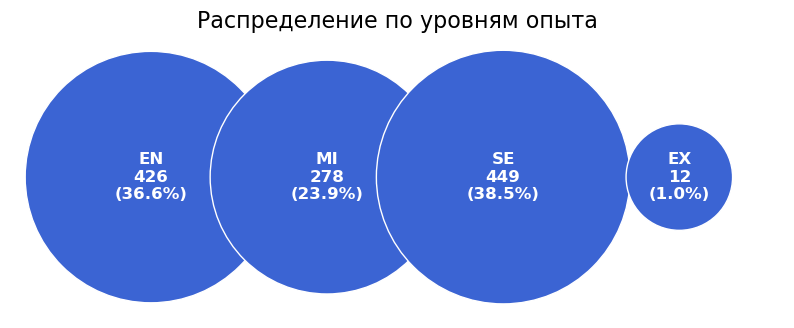

In [46]:
# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 8))

# Координаты центров кругов (x, y) и их радиусы
circles_params = []

# Стартовые координаты по X, шаг вправо и базовый радиус
x_start = 2
x_step = 2.5
base_radius = 1.8

total_count = df_count_level['Количество'].sum()
df_count_level['Процент'] = (df_count_level['Количество'] / total_count * 100).round(1)

for i, row in df_count_level.iterrows():
    label = row['Уровень опыта']
    value = row['Количество']
    # центр круга по X = старт + i * шаг, Y фиксирован
    center = (x_start + i * x_step, 4)
    
    # радиус можно сделать пропорциональным корню,
    # чтобы визуально отличались, но без уродства
    radius = base_radius * (np.log(value + 1) / np.log(df_count_level['Количество'].max() + 1))

    
    circles_params.append({
        'center': center,
        'radius': radius,
        'label': label,
        'value': value,
        'Процент': row['Процент']
    })

# Рисуем круги
for params in circles_params:
    circle = Circle(params['center'], params['radius'],  edgecolor='white', facecolor='#3B64D3')
    ax.add_patch(circle)
    # Добавляем подписи внутри кругов
    ax.text(params['center'][0], params['center'][1], 
            f"{params['label']}\n{params['value']}\n({params['Процент']}%)",
            ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Настраиваем оси и заголовок
ax.set_xlim(0, 11)
ax.set_ylim(2, 6)
ax.set_aspect('equal')  # Сохраняем пропорции кругов
ax.set_title('Распределение по уровням опыта', fontsize=16)
ax.axis('off')  # Убираем оси для чистоты

plt.show()
HTML('<img src="assets/Грейды.webp" alt="Формат работы" style="width: 80%;margin-top: 10px;">')

Важно понимать, что выборки для США и российского графиков могли отличаться (размер, отрасль, специализация).  
Терминология не полностью совпадает.  

Фокус на Middle в России против баланса EN/SE в США. В России сильнее выражен «средний класс» IT-специалистов, тогда как в США больше акцента на начинающих и очень опытных.  
Меньше Senior в России — потенциальный дефицит опытных разработчиков и архитекторов.  
Слабое представительство высших грейдов в России (Team Lead, Head, CDO/CAO) по сравнению с тенденцией в США к развитию экспертных ролей (EX — 1% в мире всё же присутствует).  
В России: необходимость программ менторства для перехода Junior → Middle и Middle → Senior. Также дефицит топ-менеджеров в IT.  
В США: более равномерное распределение между начинающими и опытными, что может говорить о развитых системах обучения и карьерного роста.  

Российский IT-рынок отличается «молодостью» (много Junior и Middle) и меньшим количеством высокоуровневых специалистов по сравнению с картиной в США.

In [47]:
categorys = df_for_us.groupby('remote_ratio')['work_year'].count().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_count= pd.DataFrame({'Уровень удаленки':categorys.index, 'Количество':categorys.values})

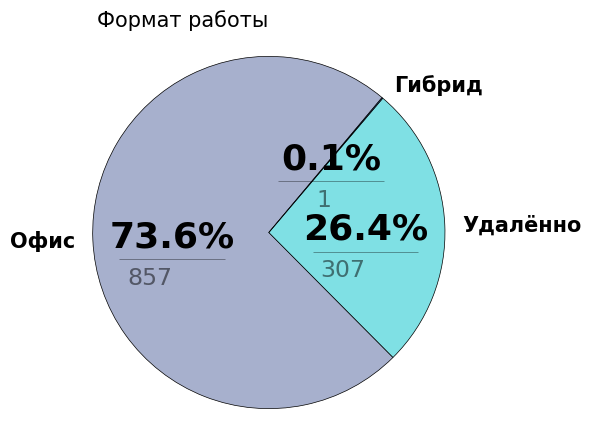

In [48]:
colors = [ '#A7B0CD','#7FE0E4', '#60ABF4']
new_labels = ['Офис', 'Удалённо','Гибрид']

plt.figure(figsize=(5, 5))

wedges, texts, autotexts = plt.pie(
    df_count['Количество'],
    labels=new_labels,
    autopct='%1.1f%%',
    startangle=50,
    textprops={'fontsize': 15, 'family':'sans-serif','fontweight': 'bold'},
    pctdistance=0.55,
    colors=colors,
    wedgeprops={'edgecolor': 'k', 'linewidth': 0.5} 
    )
# Размер для процентов
for autotext in autotexts:
    autotext.set_fontsize(26)
# Добавляем надписи под процентами
for i, autotext in enumerate(autotexts):
    count = df_count['Количество'].iloc[i]
    plt.text(
        autotext.get_position()[0],
        autotext.get_position()[1] - 0.27,
        str(count),
        ha='right',
        fontsize=17,
        color='black',
        alpha = 0.5
    )
    # Рассчитываем позицию для горизонтальной черты
    y_text = autotext.get_position()[1] - 0.25
    y_line = y_text + 0.12

    x_center = autotext.get_position()[0]
    line_width = 0.3
    
    plt.hlines(
        y=y_line,
        xmin=x_center - line_width,
        xmax=x_center + line_width,
        color='black',
        linewidth=0.5,
        alpha = 0.5
    )

plt.title('Формат работы', ha='right', fontsize=15,pad=10)
plt.axis('equal')
plt.show()
HTML('<img src="assets/формат_работы.webp" alt="Формат работы" style="width: 80%;margin-top: 10px;">')

Рынок США «консервативнее»: преобладание офисного формата (73,6%) говорит о более медленном переходе к удалёнке и гибридным моделям.  
Гибридный формат почти не представлен в США: 0,1% против 34,7% в России — возможно, связано с:  

    -разной зрелостью рынка труда
    -различиями в корпоративной культуре
    -особенностями законодательства и инфраструктуры
Рынок США «консервативнее»: преобладание офисного формата (73,6%) говорит о более медленном переходе к удалёнке и гибридным моделям.

Разброс зарплат в США абсолютно больше. Общий тренд: чем выше уровень грейда, тем больше разброс зарплат — как в России, так и в США.  
Разница в уровне дохода: в США зарплаты аналитиков данных существенно выше (в 3–4 раза в годовом эквиваленте).   
Потенциал роста: в США выше премиальные и бонусные схемы, особенно в крупных IT-компаниях.

<a class="anchor" id="7-bullet"></a>
## Итоговый вывод

Это был интересный эксперимент, датасет показывал совершенно неожиданные результаты. Его картина, что по миру, что по США сильно отличалась от данных собранных NEWHR.

Первое значительное отличие - количество Сеньоров (52%). Настоящая мечта работодателя. Зарплаты при перевод в рубли показались экстремально большими по сравнению с российским рынком. 

США занимает третье место по уровню дохода.  

Разница между самой высокой FT и самой низкой FL зарплатой составляет около 100% относительно FL. Это подчёркивает значительные различия в доходах в зависимости от типа занятости.
Наименьшая медианная зарплата у категории Freelance. 

И в мире, и в США:  
Лидерские и управленческие позиции (Lead, Manager) оплачиваются выше всего. Это подтверждает премиальность ролей с ответственностью за команду и стратегические решения.  
Инженерные и визуализационные навыки (Analytics Engineer, Data Visualization Analyst) ценятся высоко, чуть ниже топ-менеджмента.  
Базовые аналитические роли (Data Analyst, Principal Data Analyst) находятся в нижней части рейтинга.  
Data Science, несмотря на «модность» направления, пока не гарантирует самых высоких зарплат.  
Линейная регрессия так же подтвердила, что:
Роли, связанные с BI, отчётностью и управлением данными(BI Analyst, Data Reporting Analyst, Data Management Analyst), занимают промежуточное положение.
Позиции с приставкой Lead, Principal, Manager имеют больший коэффициент, чем базовые роли (Analyst, Associate).

Иерархия зарплат по уровням опыта сохранялась с 2021 по 2023. В 2024 Senior опередили Expert.

США в 2024 году показывает, что полная занятость положительно влияеит на уровень зарплаты сотрудников. В США PT более выгоден для сотрудников чем CT. На мировом рынке наблюдалась обратная картина.  
В 2024 году США демонстрируют общемировую тенденцию, при которой уровень зарплат специалистов уровня Senior превышает уровень зарплат Expert.

Получив неожиданные результаты датасета их хотелось сравнить с другим исследованием. Мой выбор пал на анализ русского(или русскоязычного) рынка за 2024 от [NEWHR](https://newhr.org/data/research-analysts-2024)  
Показатели очень различны.  
Россия: доминирует категория Middle — сформировался выраженный «средний класс» IT-специалистов.  
США: наблюдается баланс между начинающими специалистами (EN) и высококлассными экспертами (SE). Акцент сделан на двух полюсах: новички и опытные профессионалы.  

США демонстрируют относительную «консервативность» в выборе формата работы:  
    
    -73,6% специалистов работают в офисе (медленный переход к удалённой работе)  
    -гибридный формат практически не используется (0,1% против 34,7% в России)
Разброс зарплат: в США наблюдается более широкий диапазон доходов по всем грейдам (тенденция сохраняется и в России, но в меньших масштабах).  
Российский IT-рынок находится на этапе активного роста и формирования, в то время как американский рынок характеризуется зрелостью и устоявшимися механизмами работы. Существенные различия наблюдаются в распределении грейдов, форматах занятости и уровне доходов.